<b>CO2 Emissions Prediction Model</b>

Objective: To predict the CO2 emissions of a car based on relevant parameters.

Fuel Consumption Dataset Source: https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
%matplotlib inline

<b>Dataset Preprocessing</b>

We will analyse the dataset to pick the features to be used for training.

In [3]:
ds = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv')

ds.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
ds.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Since 'MODELYEAR' is a constant value and doesn't affect the target variable, ie. CO2EMISSIONS, we delete it to save space.

In [5]:
del ds['MODELYEAR']

We shall encode the non-numeric values in the dataset to be able to calculate correlation coefficients easily.

In [6]:
from sklearn.preprocessing import LabelEncoder

cols = ['MAKE','MODEL','VEHICLECLASS','TRANSMISSION','FUELTYPE']
le = LabelEncoder()

for col in cols:
    ds[col + str('_encoded')] = le.fit_transform(ds[col])

ds.head()

,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,MAKE_encoded,MODEL_encoded,VEHICLECLASS_encoded,TRANSMISSION_encoded,FUELTYPE_encoded
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196,0,329,0,10,3
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221,0,329,0,20,3
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136,0,330,0,17,3
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255,0,389,11,11,3
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244,0,483,11,11,3


We will plot out the correlation coefficients of the dataset variables to determine the training features for our target variable.

<Axes: >

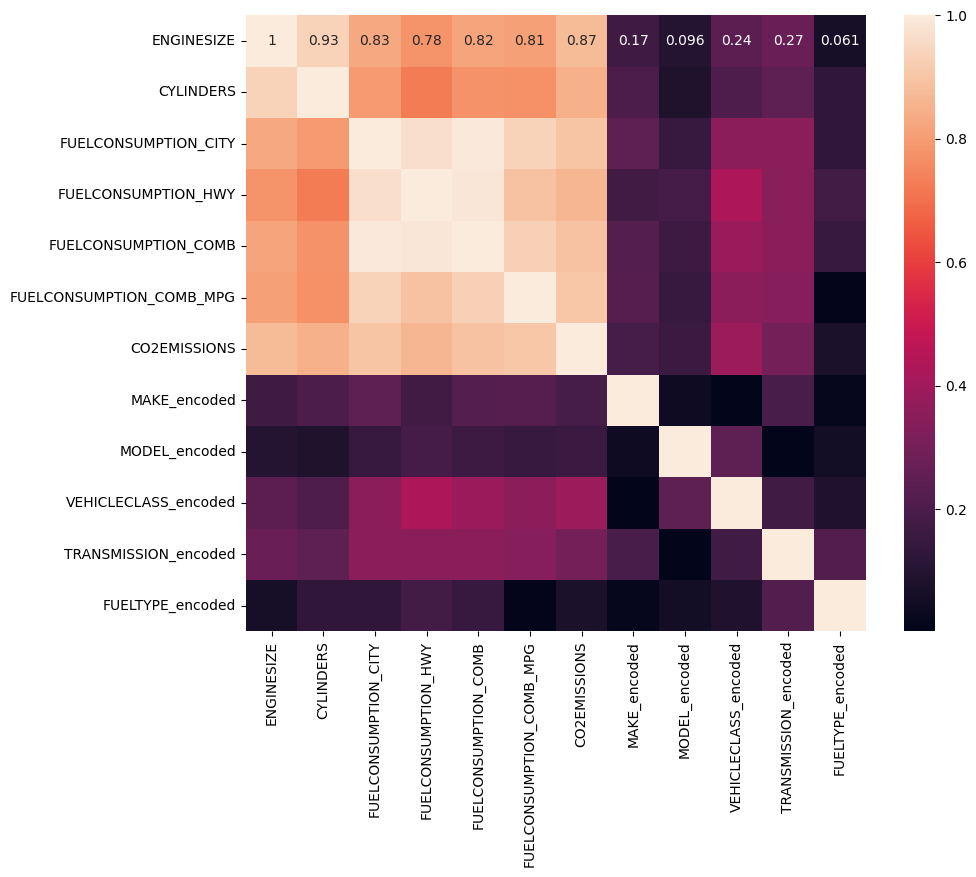

In [7]:
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(ds.corr(numeric_only=True).abs(), annot=True)

CO2EMISSIONS has a correlation coefficient greater than 0.8 with the variables ENGINESIZE, CYLINDERS, FUELCONSUMPTION_CITY, FUELCONSUMPTION_HWY and FUELCONSUMPTION_COMB.
Hence, these features will be considered for training. 

The colour of the square for correlation with VEHICLECLASS_encoded looks comparatively bright, so we will check if it's value is high enough to be considered as a training feature.

In [8]:
ds['CO2EMISSIONS'].corr(ds['VEHICLECLASS_encoded'])

0.38846762917448097

Since the value is very low compared to the other features, we will not use this feature to train our Linear Regression model.

In [9]:
# Training features array
X = np.array(ds[['ENGINESIZE','CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']])
X

array([[ 2. ,  4. ,  9.9,  6.7,  8.5],
       [ 2.4,  4. , 11.2,  7.7,  9.6],
       [ 1.5,  4. ,  6. ,  5.8,  5.9],
       ...,
       [ 3. ,  6. , 13.4,  9.8, 11.8],
       [ 3.2,  6. , 12.9,  9.3, 11.3],
       [ 3.2,  6. , 14.9, 10.2, 12.8]])

We will normalise the training dataset

In [12]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
X

array([[-0.9512918 , -0.99896853, -0.82855772, -0.99334135, -0.88430407],
       [-0.66865251, -0.99896853, -0.5114328 , -0.63532912, -0.5685715 ],
       [-1.30459092, -0.99896853, -1.77993246, -1.31555236, -1.63058106],
       ...,
       [-0.24469358,  0.11424235,  0.02524013,  0.11649658,  0.06289365],
       [-0.10337393,  0.11424235, -0.09673099, -0.06250954, -0.08062116],
       [-0.10337393,  0.11424235,  0.3911535 ,  0.25970147,  0.34992326]])

In [13]:
# Target variable
Y = np.array(ds['CO2EMISSIONS'])
Y

array([196, 221, 136, ..., 271, 260, 294], dtype=int64)

In [14]:
# Splitting the data into training and testing sets with a ratio of 70:30

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3, random_state=43)
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((746, 5), (746,), (321, 5), (321,))

In [15]:
# Training our linear regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(xtrain, ytrain)
model.coef_, model.intercept_

(array([ 13.71743542,  12.81181814, -15.60390571, -14.30604497,
         65.70662059]),
 256.31112581510587)

In [16]:
# Prediction
yhat = model.predict(xtest)
yhat[:5]

array([227.11672901, 304.08728554, 263.409353  , 193.80752306,
       387.87093937])

In [17]:
# Validation of model performance
from sklearn.metrics import r2_score

print("Mean squared error:", np.mean((yhat - ytest) ** 2))
print("Variance score:", model.score(xtest, ytest))
print("R2 score:", r2_score(yhat, ytest))

Mean squared error: 510.6396333445816
Variance score: 0.8727436154705759
R2 score: 0.8614804943852261
